<a href="https://colab.research.google.com/github/pipitoludovico/SM_data_analysis/blob/main/Multiple_Sclerosis_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pwd


/content


In [14]:
"""Dataset column descriptions

source: https://www.kaggle.com/datasets/desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis

ID: Patient identifier (int)
Age: Age of the patient (in years)
Schooling: time the patient spent in school (in years)
Gender: 1=male, 2=female
Breastfeeding: 1=yes, 2=no, 3=unknown
Varicella: 1=positive, 2=negative, 3=unknown
Initial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor and other
Mono _or_Polysymptomatic: 1=monosymptomatic, 2=polysymptomatic, 3=unknown
Oligoclonal_Bands: 0=negative, 1=positive, 2=unknown
LLSSEP: 0=negative, 1=positive
ULSSEP:0=negative, 1=positive
VEP:0=negative, 1=positive
BAEP: 0=negative, 1=positive
Periventricular_MRI:0=negative, 1=positive
Cortical_MRI: 0=negative, 1=positive
Infratentorial_MRI:0=negative, 1=positive
Spinal_Cord_MRI: 0=negative, 1=positive
initial_EDSS:?
final_EDSS:?
Group: 1=CDMS, 2=non-CDMS
Definition of some of the technical/medical terms [ref. from wikipedia if not stated explicitly].
Varicella : Another name for Chickenpox, or chicken pox, is a highly contagious disease caused by the initial infection with varicella zoster virus (VZV), a member of the herpesvirus family.
BAEP: In human neuroanatomy, brainstem auditory evoked potentials (BAEPs), also called brainstem auditory evoked responses (BAERs), are very small auditory evoked potentials in response to an auditory stimulus, which are recorded by electrodes placed on the scalp.
VEP: Visual evoked potential (VEP) is an evoked potential elicited by presenting light flash or pattern stimulus which can be used to confirm damage to visual pathway including retina, optic nerve, optic chiasm, optic radiations, and occipital cortex.
Oligoclonal bands: Oligoclonal bands (OCBs) are bands of immunoglobulins that are seen when a patient’s blood serum, or cerebrospinal fluid (CSF) is analyzed. They are used in the diagnosis of various neurological and blood diseases. Oligoclonal bands are present in the CSF of more than 95% of patients with clinically definite multiple sclerosis.
SSEP : Somatosensory evoked potentials (SSEP) are recorded from the central nervous system following stimulation of peripheral nerves. ULSSEP (upper limb SSEP), LLSSEP (lower limb SSEP)
EDSS: The Expanded Disability Status Scale (EDSS) is a method of quantifying disability in multiple sclerosis and monitoring changes in the level of disability over time. It is widely used in clinical trials and in the assessment of people with MS. 2"""

'Dataset column descriptions\n\nsource: https://www.kaggle.com/datasets/desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis\n\nID: Patient identifier (int)\nAge: Age of the patient (in years)\nSchooling: time the patient spent in school (in years)\nGender: 1=male, 2=female\nBreastfeeding: 1=yes, 2=no, 3=unknown\nVaricella: 1=positive, 2=negative, 3=unknown\nInitial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor and other\nMono _or_Polysymptomatic: 1=monosymptomatic, 2=polysymptomatic, 3=unknown\nOligoclonal_Bands: 0=negative, 1=positive, 2=unknown\nLLSSEP: 0=negative, 1=positive\nULSSEP:0=negative, 1=positive\nVEP:0=negative, 1=positive\nBAEP: 0=negative, 1=positive\nPeriventricular_MRI:0=negative, 1=positive\n

In [2]:
# imports
import os.path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [18]:
df = pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv", index_col=0)
print("# a glimpse to the db")
print(df.head(2))
print("I explore the data and notice there's a column 0 'Unnamed' which is the actual index, so I added index_col=0.")
print("# Check for duplicates")
duplicates = df.duplicated()

print("# Count the number of duplicates. Shoud there be duplicates I can drop them from the db.")
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

print("# I want to see the raw amount of data I have and the type of data")
print(df.shape)
print("# 273 entries, all numerical => I can do np operation with them.")
print(df.info())
print("TOTAL NAN: ", df.isnull().sum())


# a glimpse to the db
   Gender  Age  Schooling  Breastfeeding  Varicella  Initial_Symptom  \
0       1   34       20.0              1          1              2.0   
1       1   61       25.0              3          2             10.0   

   Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  ULSSEP  VEP  BAEP  \
0                        1                  0       1       1    0     0   
1                        2                  1       1       0    1     0   

   Periventricular_MRI  Cortical_MRI  Infratentorial_MRI  Spinal_Cord_MRI  \
0                    0             1                   0                1   
1                    0             0                   0                1   

   Initial_EDSS  Final_EDSS  group  
0           1.0         1.0      1  
1           2.0         2.0      1  
I explore the data and notice there's a column 0 'Unnamed' which is the actual index, so I added index_col=0.
# Check for duplicates
# Count the number of duplicates
Number of duplicate row

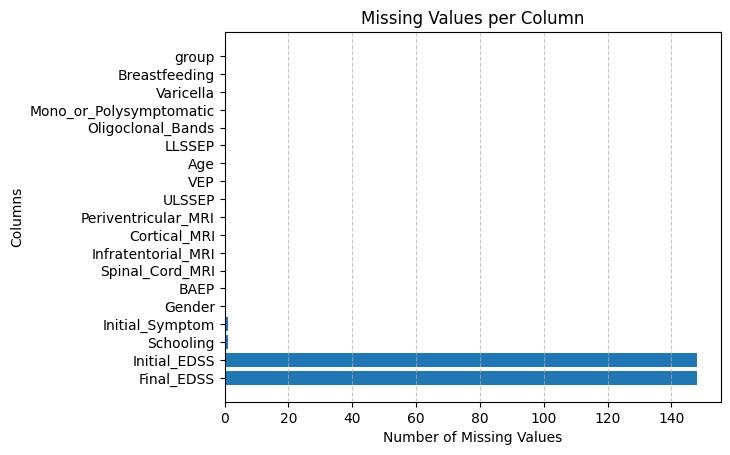

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')


In [21]:
print("# I notice there are 148 entries missing to two columns: Initial and Final EDSS")
nans = df.isnull().sum().sort_values(ascending=False)

if not os.path.exists("./plots/multiple_sclerosis_nans.png"):
    plt.barh(nans.index, nans.values)
    plt.xlabel('Number of Missing Values')
    plt.ylabel('Columns')
    plt.title('Missing Values per Column')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.savefig("./plots/multiple_sclerosis_nans.png")
    plt.show()

print(df.columns)

# lets explore the diversity of the dataset

In [ ]:
# lets explore the diversity of the dataset


# this dataset is small, mostly categorical with a few descriptive features
# from a look at the summary I could convert all the dtype to int and keep the nans
# to do so, I'll create a fourth category to EDSS, substitute 0 to Initial symptom and
# use the average distribution in schooling

In [22]:
mean_schooling = int(df['Schooling'].mean())
df['Schooling'] = np.where(df['Schooling'].isnull(), mean_schooling, df['Schooling']).astype(int)
df['Initial_Symptom'] = np.where(df['Initial_Symptom'].isnull(), 0, df['Initial_Symptom']).astype(int)
df['group'] = np.where(df['group'] == 1, 0, df['group'])
df['group'] = np.where(df['group'] == 2, 1, df['group'])

for column_edss in df.columns:
    if "EDSS" in column_edss:
        df[column_edss] = np.where(df[column_edss].isnull(), 0, df[column_edss]).astype(int)

for colum in df.columns:
    uniques = df[colum].unique().tolist()
    uniques.sort()
    print(colum, ": ", uniques)

Gender :  [1, 2]
Age :  [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 65, 70, 77]
Schooling :  [0, 6, 8, 9, 12, 14, 15, 20, 22, 23, 24, 25]
Breastfeeding :  [1, 2, 3]
Varicella :  [1, 2, 3]
Initial_Symptom :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Mono_or_Polysymptomatic :  [1, 2, 3]
Oligoclonal_Bands :  [0, 1, 2]
LLSSEP :  [0, 1]
ULSSEP :  [0, 1]
VEP :  [0, 1]
BAEP :  [0, 1]
Periventricular_MRI :  [0, 1]
Cortical_MRI :  [0, 1]
Infratentorial_MRI :  [0, 1]
Spinal_Cord_MRI :  [0, 1]
Initial_EDSS :  [0, 1, 2, 3]
Final_EDSS :  [0, 1, 2, 3]
group :  [0, 1]


Let's describe the df:

           Gender         Age   Schooling  Breastfeeding   Varicella  \
count  273.000000  273.000000  273.000000     273.000000  273.000000   
mean     1.615385   34.062271   15.175824       1.831502    1.710623   
std      0.487398   11.114369    4.236380       0.874998    0.732991   
min      1.000000   15.000000    0.000000       1.000000    1.000000   
25%      1.000000   25.000000   12.000000       1.000000    1.000000   
50%      2.000000   33.000000   15.000000       2.000000    2.000000   
75%      2.000000   40.000000   20.000000       3.000000    2.000000   
max      2.000000   77.000000   25.000000       3.000000    3.000000   

       Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  \
count       273.000000               273.000000         273.000000   
mean          6.406593                 1.725275           0.358974   
std           4.232172                 0.494066           0.558426   
min           0.000000                 1.000000

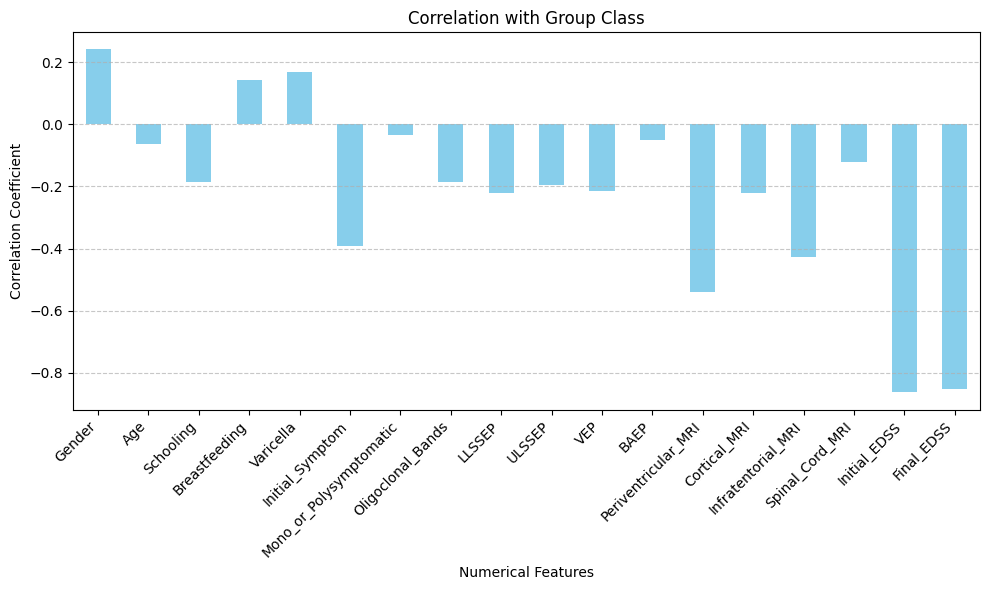

In [24]:
# now the dataframe has no nan, is type-consistent and we can mold it
print("Let's describe the df:\n")
print(df.describe())
df_num_corr = df.corr()['group'][:-1]
# Plot hd_num_corr
if not os.path.exists('./plots/MS_correlation.png'):
    plt.figure(figsize=(10, 6))
    df_num_corr.plot(kind='bar', color='skyblue')
    plt.title('Correlation with Group Class')
    plt.xlabel('Numerical Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('./plots/MS_correlation.png')
    plt.show()

In [26]:
# Lets display the pearsons correlation coefficient greater than 0.5 to evaluate the linear relationship between features
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(
    ascending=False)
print("There is/are {} strongly correlated values with pre_class:\n{}".format(len(top_features), top_features))


There is/are 3 strongly correlated values with pre_class:
Periventricular_MRI   -0.541345
Final_EDSS            -0.853611
Initial_EDSS          -0.863394
Name: group, dtype: float64


In [ ]:
# the Pearson Coefficient showed an inverse linear relationship with the Periventricular_MRI.
# I am doubtful about the EDSS as they contain mostly Unknown values that I set to 0
# intriguingly the negative correlation coeff for periventricular_MRI is counterintuitive:
# the database could be biased or the scan could be linked to other cerbrovascular diseases.

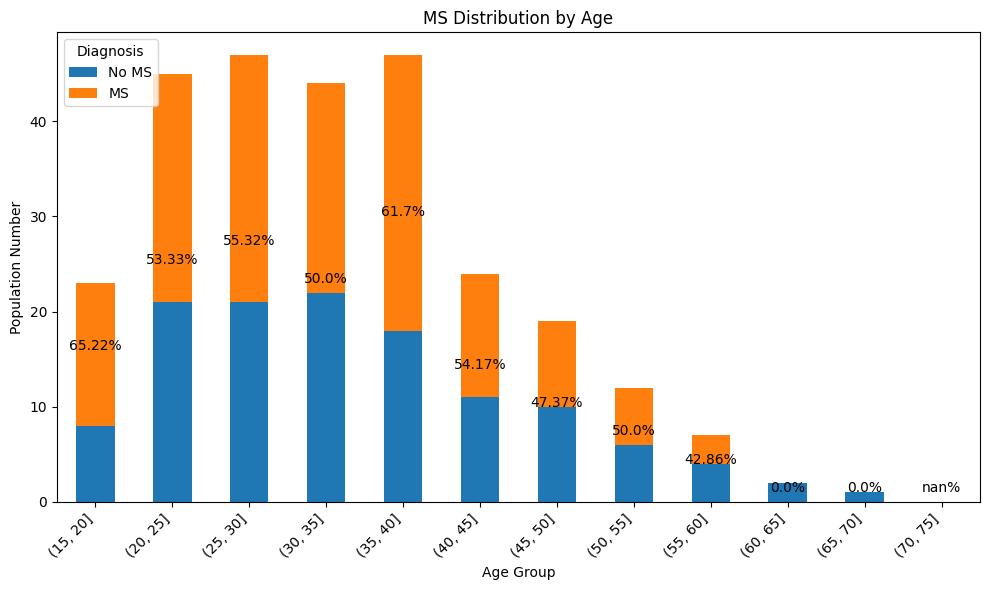

In [27]:
# let's explore the description of age and diagnosis of the database
# let's plot the incidence by age

bins = pd.interval_range(int(df['Age'].min()), int(df['Age'].max() + 1), freq=5)
labels = [f"{x.left}-{x.right}" for x in bins]
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['group'] = df['group'].apply(lambda x: 'MS' if x > 0 else 'No MS')

if not os.path.exists("./plots/MS_by_age.png"):
    # making a new dataframe grouping by age and diagnosis
    age_group_counts = df.groupby(['Age_group', 'group'], observed=False).size().unstack(fill_value=0)
    age_group_counts['Total'] = age_group_counts.sum(axis=1)
    age_group_counts['MS Disease Ratio'] = ((age_group_counts['MS'] / age_group_counts['Total']) * 100).round(2)

    ax = age_group_counts[['No MS', 'MS']].plot(kind='bar', stacked=True, figsize=(10, 6))
    # Annotate each bar with the 'MS Disease Ratio' percentage
    for i in range(len(age_group_counts.index)):
        plt.text(i, age_group_counts.iloc[i]['MS'] + 1, f"{age_group_counts.iloc[i]['MS Disease Ratio']}%", ha='center')
    plt.title('MS Distribution by Age')
    plt.xlabel('Age Group')
    plt.ylabel('Population Number')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Diagnosis', loc='upper left')
    plt.tight_layout()
    plt.savefig("./plots/MS_by_age.png")
    plt.show()

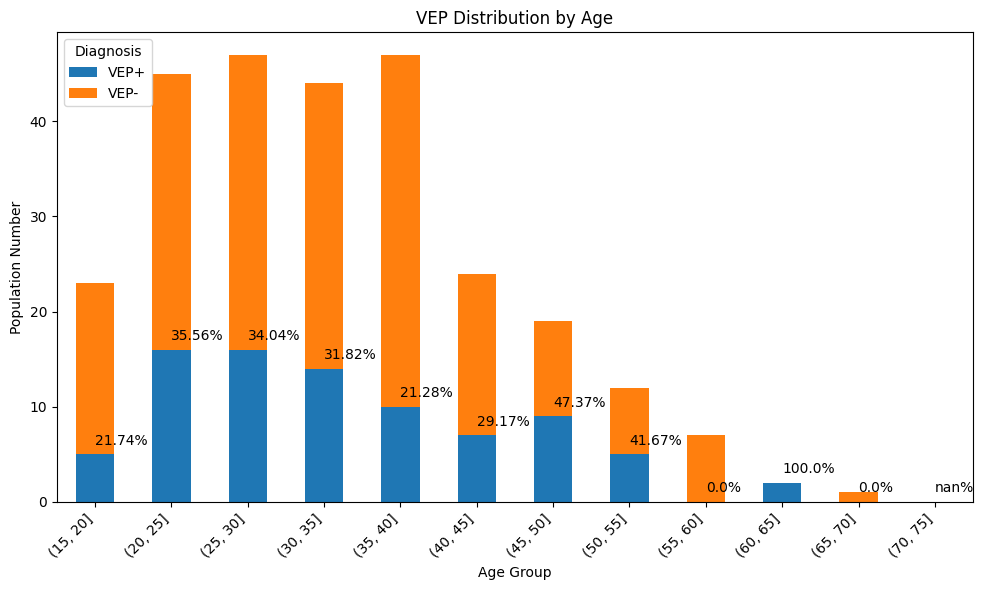

In [29]:
# let's see the distribution between age groups and VEP diagnosis. The question is:
# is there a prevalence of diagnosis of VEP due to the stimulatory symphtoms in a certain age group?
# The assumption here is that the exams are initiated at symphoms onset.
if not os.path.exists("./plots/VEP_by_age.png"):
    age_group_counts = df.groupby(['Age_group', 'VEP'], observed=False).size().unstack(fill_value=0)
    age_group_counts['Total'] = age_group_counts.sum(axis=1)
    age_group_counts['VEP+'] = age_group_counts[1]
    age_group_counts['VEP-'] = age_group_counts[0]
    ax = age_group_counts[["VEP+", "VEP-"]].plot(kind='bar', stacked=True, figsize=(10, 6))
    age_group_counts['VEP+ ratio'] = ((age_group_counts[1] / age_group_counts['Total']) * 100).round(2)
    age_group_counts['VEP- ratio'] = ((age_group_counts[0] / age_group_counts['Total']) * 100).round(2)
    for i in range(len(age_group_counts.index)):
        plt.text(i, age_group_counts.iloc[i]['VEP+'] + 1, f"{age_group_counts.iloc[i]['VEP+ ratio']}%", ha='left')
    plt.title('VEP Distribution by Age')
    plt.xlabel('Age Group')
    plt.ylabel('Population Number')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Diagnosis', loc='upper left')
    plt.tight_layout()
    plt.savefig("./plots/VEP_by_age.png")
    plt.show()

In [ ]:
# The age group between 20-35 showed a lower incidence of VEP diagnosis, suggesting that
# neural damage in the same population group proceeds at different ratios (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3248822/)
# and that the prevalence of detectable damage is higer in the later stages of the disease at older ages(45-55)

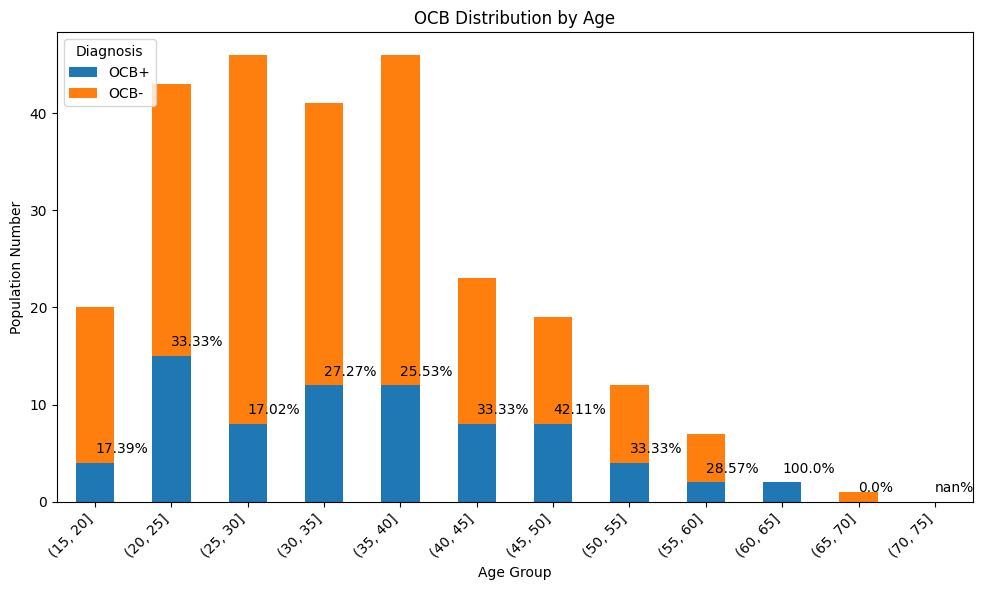

In [32]:
# Oligoclonal bands (OCBs) are bands of immunoglobulins that are seen when a patient’s blood serum, or cerebrospinal fluid (CSF.
# let's evaluate the OCBs diagnosis distribution grouped by age groups.
if not os.path.exists("./plots/OCB_by_age.png"):
    age_group_counts = df.groupby(['Age_group', 'Oligoclonal_Bands'], observed=False).size().unstack(fill_value=0)
    age_group_counts['Total'] = age_group_counts.sum(axis=1)
    age_group_counts['OCB+'] = age_group_counts[1]
    age_group_counts['OCB-'] = age_group_counts[0]
    ax = age_group_counts[["OCB+", "OCB-"]].plot(kind='bar', stacked=True, figsize=(10, 6))
    age_group_counts['OCB+ ratio'] = ((age_group_counts[1] / age_group_counts['Total']) * 100).round(2)
    age_group_counts['OCB- ratio'] = ((age_group_counts[0] / age_group_counts['Total']) * 100).round(2)
    for i in range(len(age_group_counts.index)):
        plt.text(i, age_group_counts.iloc[i]['OCB+'] + 1, f"{age_group_counts.iloc[i]['OCB+ ratio']}%", ha='left')
    plt.title('OCB Distribution by Age')
    plt.xlabel('Age Group')
    plt.ylabel('Population Number')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Diagnosis', loc='upper left')
    plt.tight_layout()
    plt.savefig("./plots/OCB_by_age.png")
    plt.show()

In [33]:
# now lets group every test and see if the positive correlation for each is correlated with the diagnosis groupings
df['tests'] = df[['VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
                  'Spinal_Cord_MRI', 'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP']].any(axis=1)

# AIM: we want to highlight if multiple tests are an accurate predictive measure for diagnosis
contingency_table = pd.crosstab(df['tests'], df['group'])
print("Contingency Table:")
print(contingency_table)
chi2_all, p_value_all, dof_all, expected_all = chi2_contingency(contingency_table)
print("Chi-squared Test statistic:", chi2_all, "P-value", p_value_all)


Contingency Table:
group   MS  No MS
tests            
False   31      0
True   117    125
Chi-squared Test statistic: 27.492145188310143 P-value 1.577338200505989e-07


In [ ]:
# the high the Chi-square value is greater than or equal to the critical value
# There is a significant difference between the groups we are studying.
# That is, the difference between actual data and the expected data
# (that assumes the groups aren’t different) is probably too great
# to be attributed to chance. So the multiple tests and the diagnosis are not a coincidence.
# with a p-value < 0.001 the statistical significance is strong.

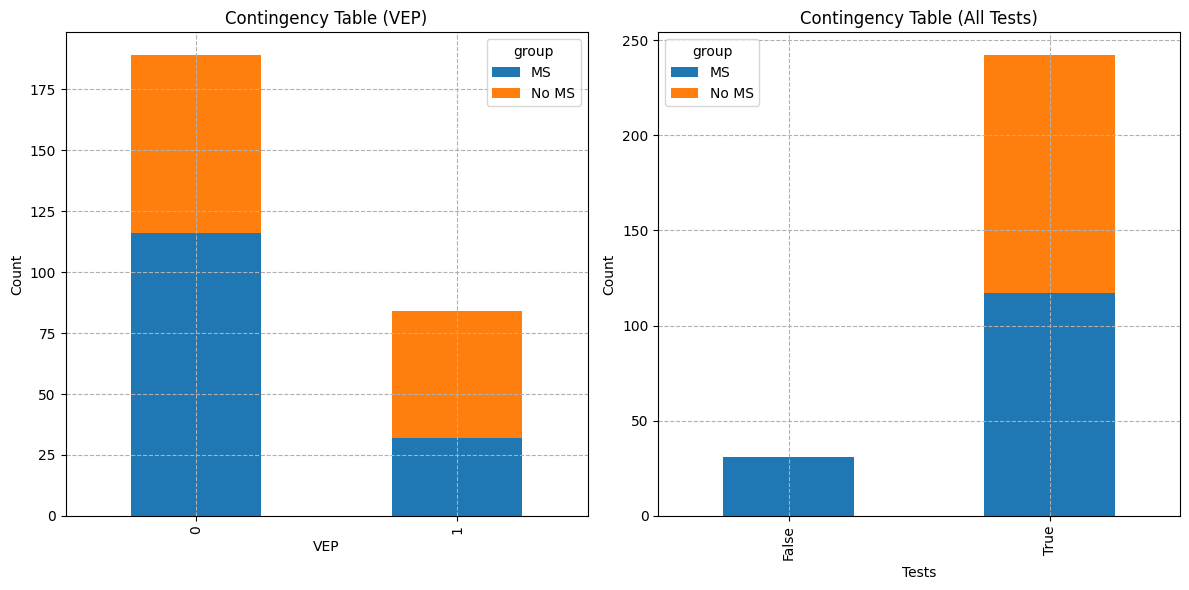

In [34]:
if not os.path.exists("./plots/CHI_SQUARED_TESTS_COMPARISON.png"):
    # plotting the graph to compare a single test with the overall contingency (can be done for any test)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    contingency_table_vep = pd.crosstab(df['VEP'], df['group'])
    contingency_table_vep.plot(kind='bar', stacked=True, ax=axes[0])
    axes[0].set_title('Contingency Table (VEP)')
    axes[0].set_xlabel('VEP')
    axes[0].set_ylabel('Count')
    axes[0].grid(linestyle='--')
    # let's compare the correlation with the totality of the tests
    contingency_table_all = pd.crosstab(df['tests'], df['group'])
    contingency_table_all.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title('Contingency Table (All Tests)')
    axes[1].set_xlabel('Tests')
    axes[1].set_ylabel('Count')
    axes[1].grid(linestyle='--')

    # Mostra il plot
    plt.tight_layout()
    plt.savefig("./plots/CHI_SQUARED_TESTS_COMPARISON.png")
    plt.show()
    plt.close()


In [35]:
# ANOVA test across all groups
anova_result = f_oneway(*[group['tests'].values for name, group in df.groupby('group')])
print(f'\n\nANOVA result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}')

# Conducting post-hoc analysis if ANOVA is significant
if anova_result.pvalue < 0.05:
    print("Significant differences were found, performing post-hoc testing...")
    # Performing Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=df['tests'],
                                     groups=df['group'],
                                     alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences were found among groups.")




ANOVA result: F-statistic = 32.88, p-value = 0.0000
Significant differences were found, performing post-hoc testing...
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    MS  No MS   0.2095   0.0 0.1375 0.2814   True
-------------------------------------------------


In [ ]:
# The F-statistic value of 32.88 suggests that there is a significant variability between the groups'
# means compared to the variability within the groups.
# The p-value of 0.0000 indicates that there is strong evidence against the null hypothesis,
# suggesting that at least one pair of means is significantly different from each other.
# The post-hoc Tukey HSD (Honestly Significant Difference) test was conducted to determine
# which specific pairs of group means are significantly different from each other
# after finding a significant result in the ANOVA test.


In [36]:
# the database is pretty much qualitative. Age and Schooling can be scaled.
# We don't need to scale the others.
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

mapping = {'No MS': 0, 'MS': 1}
df['group'] = df['group'].map(mapping)
scaler = MinMaxScaler()
scaled_age = scaler.fit_transform(df[['Age']])
scaled_schooling = scaler.fit_transform(df[['Schooling']])
df['Age'] = scaled_age
df['Schooling'] = scaled_schooling

y = df["group"]
X = df.drop(columns=['group', 'Age_group'])  # I'm dropping features I'm not using anymore
print(X)
pca = PCA(n_components=0.95)  # keep 95% of variance
df_pca = pca.fit_transform(X)
print(f"Explained Variance: {pca.explained_variance_ratio_}")


     Gender       Age  Schooling  Breastfeeding  Varicella  Initial_Symptom  \
0         1  0.306452       0.80              1          1                2   
1         1  0.741935       1.00              3          2               10   
2         1  0.112903       0.80              3          1                3   
3         2  0.419355       0.60              1          1                7   
4         2  0.306452       0.80              2          1                6   
..      ...       ...        ...            ...        ...              ...   
268       2  0.258065       0.32              3          1                9   
269       1  0.096774       0.60              3          3                5   
270       2  0.064516       0.48              3          3               13   
271       2  0.274194       0.60              3          3               15   
272       2  1.000000       0.24              3          3                2   

     Mono_or_Polysymptomatic  Oligoclonal_Bands  LL

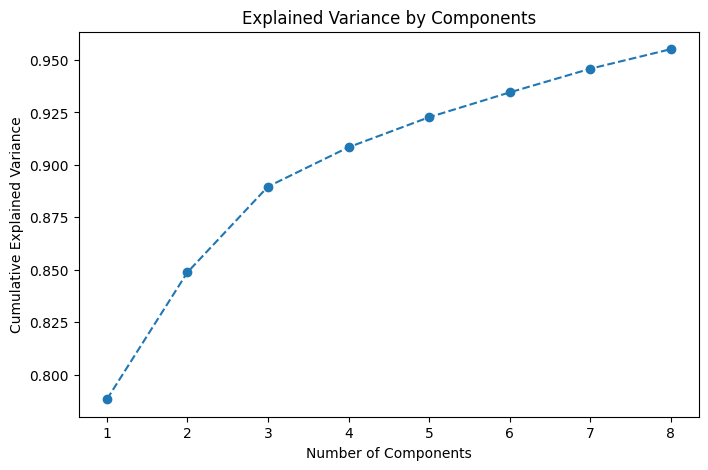

In [37]:
# Cumulative variance explained by the principal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier

# choosing a list of models to evaluate:
# Create a list of models to evaluate. Now, in hindsight, the database is too small
# and overfitting is inevitable. But this being a demo is still ok.
# To evaluate the reliability of the algorithm I used a crossvalidation  dividing the db in 5 chunks
# randomizing the opporunity of randomness.

def model_evaluation(df):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=43)
    kf = KFold(n_splits=5, shuffle=True, random_state=43)

    models = {
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(random_state=43),
        'Random Forest': RandomForestClassifier(random_state=43),
        'Gradient Boosting': GradientBoostingClassifier(random_state=43),
        'Support Vector Machine': SVC(random_state=43),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=43),
        'Ada Boost': AdaBoostClassifier(random_state=43),
        'XG Boost': XGBClassifier(random_state=43),
    }

    model_scores = []
    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        metric = accuracy_score(y_test, y_pred)
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        model_scores.append((name, metric))
        print(name , 'mse :' , mean_squared_error(y_test , y_pred))
        print("Cross validation score:", scores)

    sm = sorted(model_scores, key=lambda x_: x_[1], reverse=False)
    for model in sm:
        print('accuracy score of', f'{model[0]} is {model[1]}')
    print("***************************************")


In [57]:
model_evaluation(X)

Naive Bayes mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
Logistic Regression mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
Random Forest mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
Gradient Boosting mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
Support Vector Machine mse : 0.0
Cross validation score: [1.         1.         0.97727273 0.97674419 1.        ]
K-Nearest Neighbors mse : 0.01818181818181818
Cross validation score: [0.88636364 0.90909091 0.93181818 0.93023256 1.        ]
Decision Tree mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
Ada Boost mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
XG Boost mse : 0.0
Cross validation score: [1. 1. 1. 1. 1.]
accuracy score of K-Nearest Neighbors is 0.9818181818181818
accuracy score of Naive Bayes is 1.0
accuracy score of Logistic Regression is 1.0
accuracy score of Random Forest is 1.0
accuracy score of Gradient Boosting is 1.0
accuracy score of Support Vector Machine is 1.0
accuracy score of Decision Tree i

In [58]:
# I'll use XGBoost and RandForest

# Parameter for XGBoost
param_1 = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',  # change to 'multi:softprob' for probabilities
    'num_class': 5,
    'verbosity': 0,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
    'eval_metric': 'mlogloss'
}
param_2 = {'booster': 'gbtree',
           'objective': 'multi:softmax',
           'num_class': 5,
           'verbosity': 0,
           'colsample_bytree': 0.7,
           'eta': 0.04,
           'gamma': 0.5,
           'lambda': 5,
           'max_depth': 5,
           'min_child_weight': 5,
           'subsample': 0.6,
           'seed': 1001,
           'silent': 1,
           'nthread': 4,
           'eval_metric': 'mlogloss'}

# Parameter for Random Forest
param_rf = {
    'n_estimators': 100,
    'max_depth': 6,
    'min_samples_leaf': 3,
    'max_features': 0.7,
    'max_samples': 0.7,
    'min_impurity_decrease': 0.1,
    'bootstrap': True,
    'verbose': 0,
    'random_state': 1002,
    'n_jobs': 4
}

param_rf_2 = {
    'n_estimators': 100,
    'max_depth': 6,
    'min_samples_leaf': 4,
    'max_features': 0.7,
    'max_samples': 0.6,
    'min_impurity_decrease': 0.02,
    'bootstrap': True,
    'verbose': 0,
    'random_state': 1002,
    'n_jobs': 4
}

In [61]:
def xgbresult_multiclass_cv(table, label, param):
    model = None
    print('xgboost - multi-class classification with 10-fold cross-validation')

    # Reset the index of the DataFrame to avoid KeyError
    table = table.reset_index(drop=True)
    label = label.reset_index(drop=True)

    # Parameters for the XGBoost model
    params = param

    # 10-fold cross-validation setup
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
    accuracy_scores = []
    f1_scores = []
    recall_scores = []
    precision_scores = []

    # Perform cross-validation
    for train_idx, test_idx in kfold.split(table, label):
        Xc_train, Xc_test = table.iloc[train_idx], table.iloc[test_idx]
        yc_train, yc_test = label[train_idx], label[test_idx]

        # Convert data into DMatrix format for XGBoost
        dtrain = xgb.DMatrix(data=Xc_train, label=yc_train)
        dtest = xgb.DMatrix(data=Xc_test, label=yc_test)

        # Train the XGBoost model with the training fold
        num_rounds = 500
        model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds)

        # Make predictions on the testing fold
        preds = model.predict(dtest)
        # For softprob, predictions need to be converted to class labels
        if params['objective'] == 'multi:softprob':
            preds = preds.argmax(axis=1)

        # Calculate the accuracy and other metrics of the current fold
        fold_accuracy = accuracy_score(yc_test, preds)
        fold_f1 = f1_score(yc_test, preds, average='weighted')
        fold_recall = recall_score(yc_test, preds, average='weighted')
        fold_precision = precision_score(yc_test, preds, average='weighted')

        accuracy_scores.append(fold_accuracy)
        f1_scores.append(fold_f1)
        recall_scores.append(fold_recall)
        precision_scores.append(fold_precision)

    # Calculate the average of each metric across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_f1 = np.mean(f1_scores)
    avg_recall = np.mean(recall_scores)
    avg_precision = np.mean(precision_scores)

    # Print the results
    print(f"Average Accuracy: {avg_accuracy * 100:.2f}%")
    print(f"Average F1-Score: {avg_f1:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")

    return model

XGBmodel = xgbresult_multiclass_cv(X, y, param_1)

xgboost - multi-class classification with 10-fold cross-validation
Average Accuracy: 100.00%
Average F1-Score: 1.0000
Average Recall: 1.0000
Average Precision: 1.0000


In [ ]:
def rfresult_multiclass_cv(table, label, param):
    model = None
    print('Random Forest - multi-class classification with 10-fold cross-validation')

    # Reset the index of the DataFrame to avoid KeyError
    table = table.reset_index(drop=True)
    label = label.reset_index(drop=True)

    # Parameters for the Random Forest model
    params = param

    # 10-fold cross-validation setup
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
    accuracy_scores = []
    f1_scores = []
    recall_scores = []
    precision_scores = []

    # Perform cross-validation
    for train_idx, test_idx in kfold.split(table, label):
        Xc_train, Xc_test = table.iloc[train_idx], table.iloc[test_idx]
        yc_train, yc_test = label[train_idx], label[test_idx]

        # Create and train the Random Forest model with the training fold
        model = RandomForestClassifier(**params)
        model.fit(Xc_train, yc_train)

        # Make predictions on the testing fold
        preds = model.predict(Xc_test)

        # Calculate the accuracy and other metrics of the current fold
        fold_accuracy = accuracy_score(yc_test, preds)
        fold_f1 = f1_score(yc_test, preds, average='weighted')
        fold_recall = recall_score(yc_test, preds, average='weighted')
        fold_precision = precision_score(yc_test, preds, average='weighted')

        accuracy_scores.append(fold_accuracy)
        f1_scores.append(fold_f1)
        recall_scores.append(fold_recall)
        precision_scores.append(fold_precision)

    # Calculate the average of each metric across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_f1 = np.mean(f1_scores)
    avg_recall = np.mean(recall_scores)
    avg_precision = np.mean(precision_scores)

    # Print the results
    print(f"Average Accuracy: {avg_accuracy * 100:.2f}%")
    print(f"Average F1-Score: {avg_f1:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")

    return model


rfresult_multiclass_cv(X, y, param_rf)


def xgbresult_multiclass_gridsearch(table, label):
    print('xgboost - multi-class classification with grid search')

    # Define initial model
    model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, verbosity=0, silent=0)

    # Define parameter grid
    param_grid = {
        'eta': [0.02, 0.04, 0.06, 0.08, 0.1],
        'max_depth': [4, 5, 6, 7],
        'lambda': [1, 2, 5],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.3, 0.5, 1, 1.5],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

    # Split data into training and testing sets
    Xc_train, Xc_test, yc_train, yc_test = train_test_split(table, label, stratify=label, test_size=0.2,
                                                            random_state=100)

    # Fit GridSearchCV
    grid_search.fit(Xc_train, yc_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Make predictions with the best model
    preds = best_model.predict(Xc_test)

    # Calculate the accuracy
    accuracy = accuracy_score(yc_test, preds)
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy * 100:.2f}%")

    return best_model

best_model_ = xgbresult_multiclass_gridsearch(X, y)

Random Forest - multi-class classification with 10-fold cross-validation
Average Accuracy: 100.00%
Average F1-Score: 1.0000
Average Recall: 1.0000
Average Precision: 1.0000
xgboost - multi-class classification with grid search
Fitting 3 folds for each of 21600 candidates, totalling 64800 fits
